In [1]:
# Imports
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Dataset
# calling the dataset
df = pd.read_csv('./IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# dimensions
print(f'No of rows: {df.shape[0]}')
print(f'No of Columns: {df.shape[1]}')

No of rows: 150
No of Columns: 5


In [4]:
# checking for the imbalance
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Measurements')

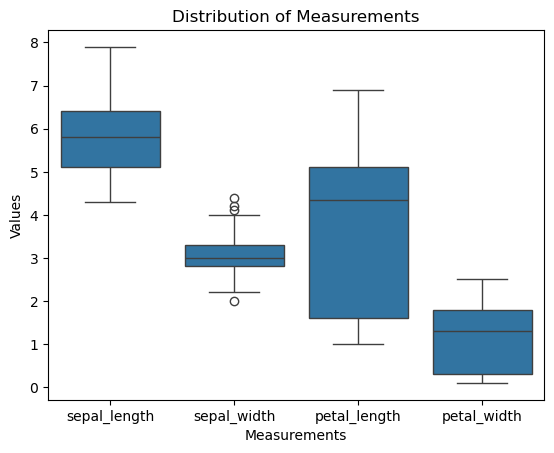

In [5]:
# distributions of the variables
df1 = df.drop('species', axis=1).melt(value_vars=df.drop('species', axis=1).columns)
sns.boxplot(df1, x='variable', y='value')
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.title('Distribution of Measurements')

In [6]:
# forming X and y
X = df.drop('species', axis=1)
y = df['species']

In [7]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'Y Train: {y_train.shape}')
print(f'Y Test: {y_test.shape}')

X Train: (120, 4)
X Test: (30, 4)
Y Train: (120,)
Y Test: (30,)


In [10]:
# scaling
preprocess = Pipeline([
    ('scaler', StandardScaler())
])

# model
model = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression())])

In [11]:
# prediction
y_pred = model.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Confusion Matrix for the classification')

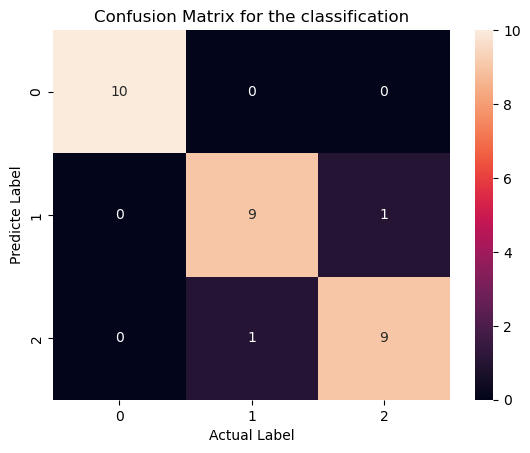

In [12]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Label')
plt.ylabel('Predicte Label')
plt.title('Confusion Matrix for the classification')

In [13]:
# classification
cr = classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [15]:
# saving the model
with open('./model.pkl', 'wb') as fp:
    pickle.dump(model, fp)